## Transfer Learning Inception V3 using Keras

Please download the dataset from the below url

In [1]:
print("hello")

hello


In [ ]:
pip uninstall tensorflow==2.5.0

In [1]:
!pip install tensorflow==2.4.0

ERROR: Could not find a version that satisfies the requirement tensorflow==2.4.0 (from versions: 2.5.0, 2.5.1, 2.5.2, 2.5.3, 2.6.0rc0, 2.6.0rc1, 2.6.0rc2, 2.6.0, 2.6.1, 2.6.2, 2.6.3, 2.7.0rc0, 2.7.0rc1, 2.7.0, 2.7.1, 2.8.0rc0, 2.8.0rc1, 2.8.0, 2.9.0rc0, 2.9.0rc1, 2.9.0rc2)
ERROR: No matching distribution found for tensorflow==2.4.0


In [2]:
import tensorflow as tf

In [3]:
from tensorflow.compat.v1 import ConfigProto
from tensorflow.compat.v1 import InteractiveSession

config = ConfigProto()
config.gpu_options.per_process_gpu_memory_fraction = 0.5
config.gpu_options.allow_growth = True
session = InteractiveSession(config=config)

In [4]:
# import the libraries as shown below

from tensorflow.keras.layers import Input, Lambda, Dense, Flatten
from tensorflow.keras.models import Model
#from tensorflow.keras.applications.resnet152V2 import ResNet152V2
#from keras.applications.vgg16 import VGG16
from tensorflow.keras.applications.inception_v3 import preprocess_input
from tensorflow.keras.preprocessing import image
from tensorflow.keras.preprocessing.image import ImageDataGenerator,load_img
from tensorflow.keras.models import Sequential
import numpy as np
from glob import glob
#import matplotlib.pyplot as plt

In [5]:
# re-size all the images to this
IMAGE_SIZE = [224, 224]

train_path = 'Datasets/train'
valid_path = 'Datasets/test'


In [6]:
# Import the Vgg 16 library as shown below and add preprocessing layer to the front of VGG
# Here we will be using imagenet weights
import tensorflow
resnet152V2 =tensorflow.keras.applications.ResNet152V2(input_shape=IMAGE_SIZE + [3], weights='imagenet', include_top=False)




In [7]:
# don't train existing weights
for layer in resnet152V2.layers:
    layer.trainable = False

In [8]:
  # useful for getting number of output classes
folders = glob('Datasets/train/*')

In [10]:
# our layers - you can add more if you want
x = Flatten()(resnet152V2.output)

In [11]:
prediction = Dense(len(folders), activation='softmax')(x)

# create a model object
model = Model(inputs=resnet152V2.input, outputs=prediction)

In [12]:

# view the structure of the model
model.summary()


Model: "model"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            [(None, 224, 224, 3) 0                                            
__________________________________________________________________________________________________
conv1_pad (ZeroPadding2D)       (None, 230, 230, 3)  0           input_1[0][0]                    
__________________________________________________________________________________________________
conv1_conv (Conv2D)             (None, 112, 112, 64) 9472        conv1_pad[0][0]                  
__________________________________________________________________________________________________
pool1_pad (ZeroPadding2D)       (None, 114, 114, 64) 0           conv1_conv[0][0]                 
______________________________________________________________________________________________

In [13]:
# tell the model what cost and optimization method to use
model.compile(
  loss='categorical_crossentropy',
  optimizer='adam',
  metrics=['accuracy']
)


In [14]:
# Use the Image Data Generator to import the images from the dataset
from tensorflow.keras.preprocessing.image import ImageDataGenerator

train_datagen = ImageDataGenerator(rescale = 1./255,
                                   shear_range = 0.2,
                                   zoom_range = 0.2,
                                   horizontal_flip = True)

test_datagen = ImageDataGenerator(rescale = 1./255)

In [15]:
# Make sure you provide the same target size as initialied for the image size
training_set = train_datagen.flow_from_directory('Datasets/train',
                                                 target_size = (224, 224),
                                                 batch_size = 32,
                                                 class_mode = 'categorical')

Found 1951 images belonging to 4 classes.


In [16]:
test_set = test_datagen.flow_from_directory('Datasets/test',
                                            target_size = (224, 224),
                                            batch_size = 32,
                                            class_mode = 'categorical')

Found 18 images belonging to 4 classes.


In [17]:
# fit the model
# Run the cell. It will take some time to execute
r = model.fit(
  training_set,
  validation_data=test_set,
  epochs=20,
  steps_per_epoch=len(training_set),
  validation_steps=len(test_set)
)

Epoch 1/20
61/61 [==============================] - 59s 597ms/step - loss: 1.6302 - accuracy: 0.8063 - val_loss: 0.0161 - val_accuracy: 1.0000
Epoch 2/20
61/61 [==============================] - 30s 484ms/step - loss: 0.4339 - accuracy: 0.9375 - val_loss: 0.0351 - val_accuracy: 1.0000
Epoch 3/20
61/61 [==============================] - 30s 485ms/step - loss: 0.5097 - accuracy: 0.9262 - val_loss: 0.8000 - val_accuracy: 0.8889
Epoch 4/20
61/61 [==============================] - 31s 500ms/step - loss: 0.5363 - accuracy: 0.9436 - val_loss: 1.1750 - val_accuracy: 0.8889
Epoch 5/20
61/61 [==============================] - 31s 511ms/step - loss: 0.2801 - accuracy: 0.9549 - val_loss: 1.0741 - val_accuracy: 0.8889
Epoch 6/20
61/61 [==============================] - 32s 520ms/step - loss: 0.2961 - accuracy: 0.9657 - val_loss: 0.0456 - val_accuracy: 0.9444
Epoch 7/20
61/61 [==============================] - 31s 510ms/step - loss: 0.1582 - accuracy: 0.9749 - val_loss: 0.1624 - val_accuracy: 0.9444

In [18]:
import matplotlib.pyplot as plt

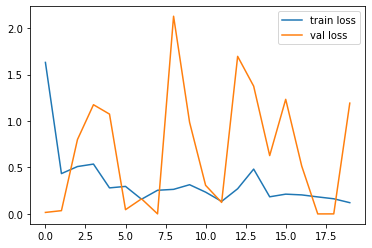

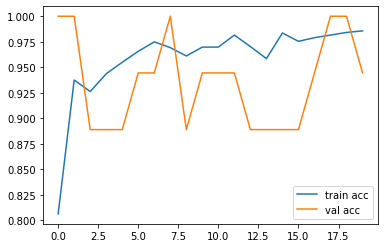

<Figure size 432x288 with 0 Axes>

In [19]:
# plot the loss
plt.plot(r.history['loss'], label='train loss')
plt.plot(r.history['val_loss'], label='val loss')
plt.legend()
plt.show()
plt.savefig('LossVal_loss')

# plot the accuracy
plt.plot(r.history['accuracy'], label='train acc')
plt.plot(r.history['val_accuracy'], label='val acc')
plt.legend()
plt.show()
plt.savefig('AccVal_acc')

In [27]:
# save it as a h5 file


from tensorflow.keras.models import load_model

model.save('model_resnet152V2.h5')

In [28]:

y_pred = model.predict(test_set)


In [29]:
y_pred

array([[1.46347151e-27, 1.00000000e+00, 8.52559924e-24, 4.79563333e-10],
       [1.55202969e-38, 1.00000000e+00, 1.96014096e-36, 2.12070912e-31],
       [8.12779291e-26, 0.00000000e+00, 1.00000000e+00, 0.00000000e+00],
       [1.98259581e-36, 1.08141094e-29, 1.06527979e-20, 1.00000000e+00],
       [1.12561654e-17, 0.00000000e+00, 1.00000000e+00, 2.65470591e-37],
       [8.06347016e-05, 1.11345481e-29, 9.99919415e-01, 4.48130890e-31],
       [0.00000000e+00, 2.78299675e-24, 1.00000000e+00, 0.00000000e+00],
       [1.00000000e+00, 4.93066843e-22, 4.92105722e-33, 0.00000000e+00],
       [1.00000000e+00, 2.81673799e-23, 0.00000000e+00, 0.00000000e+00],
       [0.00000000e+00, 1.00000000e+00, 0.00000000e+00, 0.00000000e+00],
       [0.00000000e+00, 1.00000000e+00, 0.00000000e+00, 0.00000000e+00],
       [0.00000000e+00, 1.00000000e+00, 0.00000000e+00, 0.00000000e+00],
       [2.94496876e-13, 8.44096234e-12, 3.83556335e-19, 1.00000000e+00],
       [7.98874880e-21, 2.45100424e-26, 1.75618877e

In [33]:
import numpy as np
y_pred = np.argmax(y_pred, axis=1)

AxisError: axis 1 is out of bounds for array of dimension 1

In [34]:
y_pred

array([1, 1, 2, 3, 2, 2, 2, 0, 0, 1, 1, 1, 3, 3, 3, 0, 2, 1], dtype=int64)

In [ ]:
from tensorflow.keras.models import load_model
from tensorflow.keras.preprocessing import image

In [ ]:
model=load_model('model_resnet152V2.h5')

In [ ]:
img_data

In [ ]:
img=image.load_img('test data comp files/dis_leaf (124)_compressed.jpg',target_size=(224,224))



In [ ]:
x=image.img_to_array(img)
x

In [ ]:
x.shape

In [ ]:
x=x/255

In [ ]:
import numpy as np
x=np.expand_dims(x,axis=0)
img_data=preprocess_input(x)
img_data.shape

In [ ]:
model.predict(img_data)

In [ ]:
a=np.argmax(model.predict(img_data), axis=1)

In [ ]:
a==1

In [2]:
import tensorflow as tf

In [3]:
tf.__version__

'2.5.0'